In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [63]:
df=pd.read_excel("D:\\resources\\data set\\credits\\a_Dataset_CreditScoring.xlsx")
pd.set_option("display.max_columns", None)
df.head(10)

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,0,0,0,5.0,19410.0,21147.0,16.0,2,1,3.0,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,0,0,1,1.0,16776.0,20971.0,1.0,0,0,1.0,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,0,2,10,19.0,16903.0,47593.0,21.0,1,1,4.0,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,0,2,4,3.0,18339.0,20093.0,1.0,1,0,2.0,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,0,0,0,1.0,2327.0,1860.0,3.0,4,1,1.0,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000
5,1,1483,1,1,1,2,2.0,0,124,3,1,4,5,5.0,5961.0,5800.0,5.0,2,0,4.0,4.0,1.0278,0.5000,0,0,2,0.6250,0,0,1.0000
6,1,1514,0,0,0,1,3.0,1,148,10,0,2,6,14.0,55642.0,77854.0,24.0,0,0,7.0,9.0,0.7147,0.5926,3,0,0,0.5185,0,0,0.4286
7,1,1911,3,2,0,5,1.0,3,124,2,1,4,6,7.0,14577.0,21638.0,12.0,0,0,4.0,4.0,0.6737,0.5333,2,0,2,0.4667,1,1,0.8571
8,1,2596,1,1,0,2,0.0,3,286,6,0,2,6,6.0,26853.0,33562.0,5.0,6,2,3.0,4.0,0.8001,0.1538,1,5,6,0.4615,5,5,1.0000
9,1,2767,0,0,0,0,15.0,0,175,25,0,0,0,10.0,36424.0,61036.0,17.0,1,0,4.0,5.0,0.5968,0.6111,1,0,1,0.5556,0,0,0.0000


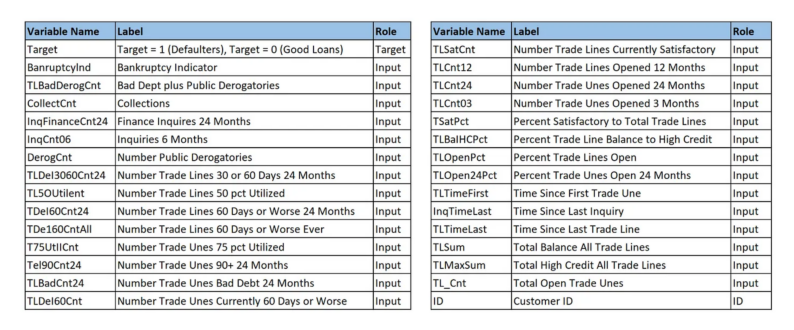

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as imgplt

img = imgplt.imread(r"D:\all projs ml\credit\Screenshot 2024-06-10 032556.png")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

1. **TARGET**
   - **Explanation:** This shows if a loan went bad (1) or if it was paid back on time (0).

2. **ID**
   - **Explanation:** A unique number used to identify each customer.

3. **DerogCnt**
   - **Explanation:** The number of serious negative marks on their credit report, like bankruptcies or court judgments.

4. **CollectCnt**
   - **Explanation:** How many times the person's debts have been sent to collections because they weren't paid.

5. **BankruptcyInd**
   - **Explanation:** Shows if the person has declared bankruptcy.

6. **InqCnt06**
   - **Explanation:** How many times in the last 6 months the person applied for credit (like loans or credit cards).

7. **InqTimeLast**
   - **Explanation:** How long ago the person last applied for credit.

8. **InqFinanceCnt24**
   - **Explanation:** How many times in the last 24 months the person applied for credit (like loans or credit cards).

9. **TLTimeFirst**
   - **Explanation:** How long ago the person opened their first credit account.

10. **TLTimeLast**
    - **Explanation:** How long ago the person opened their most recent credit account.

11. **TLCnt03**
    - **Explanation:** How many new credit accounts the person opened in the last 3 months.

12. **TLCnt12**
    - **Explanation:** How many new credit accounts the person opened in the last 12 months.

13. **TLCnt24**
    - **Explanation:** How many new credit accounts the person opened in the last 24 months.

14. **TLCnt**
    - **Explanation:** The total number of active credit accounts the person has.

15. **TLSum**
    - **Explanation:** The total amount of money the person owes across all credit accounts.

16. **TLMaxSum**
    - **Explanation:** The highest credit limit the person has had across all credit accounts.

17. **TLSatCnt**
    - **Explanation:** How many of the person's credit accounts are in good standing.

18. **TLDel60Cnt**
    - **Explanation:** The number of credit accounts that are currently 60 days or more overdue.

19. **TLBadCnt24**
    - **Explanation:** The number of credit accounts considered bad debt in the last 24 months.

20. **TL75UtilCnt**
    - **Explanation:** The number of credit accounts where the person has used at least 75% of the credit limit.

21. **TL50UtilCnt**
    - **Explanation:** The number of credit accounts where the person has used at least 50% of the credit limit.

22. **TLBalHCPct**
    - **Explanation:** How much of their available credit the person is using.

23. **TLSatPct**
    - **Explanation:** The percentage of the person's credit accounts that are in good standing.

24. **TLDel3060Cnt24**
    - **Explanation:** How many times in the last 24 months the person was late on payments by 30 or 60 days.

25. **TLDel90Cnt24**
    - **Explanation:** How many times in the last 24 months the person was late on payments by 90 days or more.

26. **TLDel60CntAll**
    - **Explanation:** The total number of times the person has ever been late on payments by 60 days or more.

27. **TLOpenPct**
    - **Explanation:** The percentage of the person's credit accounts that are currently active.

28. **TLBadDerogCnt**
    - **Explanation:** The number of bad debts and serious negative marks (like bankruptcies or liens) on their credit.

29. **TLDel60Cnt24**
    - **Explanation:** How many times in the last 24 months the person was late on payments by 60 days or more.

30. **TLOpen24Pct**
    - **Explanation:** The percentage of new credit accounts opened in the last 24 months.

These simplified explanations should help someone without a financial background understand what each attribute means and how it might be used to evaluate a person's creditworthiness.

In [65]:
df.describe()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,TLCnt24,TLCnt,TLSum,TLMaxSum,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2997.000000,2960.000000,2960.000000,2996.000000,3000.000000,3000.000000,2901.000000,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,62922.683667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,0.275000,1.821333,3.882333,7.879546,20151.095608,31205.900676,13.511682,1.522000,0.567000,3.121682,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,37203.691912,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,0.582084,1.925265,3.396714,5.421595,19682.086262,29092.908099,8.931769,2.809653,1.324423,2.605435,3.108076,0.266486,0.234759,1.163633,1.609508,3.407255,0.206722,2.460434,1.806124,0.480105
min,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30376.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,0.000000,1.000000,4.000000,5699.750000,10236.000000,6.000000,0.000000,0.000000,1.000000,2.000000,0.501100,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,62872.500000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,1.000000,3.000000,7.000000,15546.500000,24188.500000,12.000000,0.000000,0.000000,3.000000,3.000000,0.695500,0.527050,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,96156.500000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,0.000000,3.000000,6.000000,11.000000,28303.250000,44756.250000,19.000000,2.000000,1.000000,4.000000,6.000000,0.840650,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,126503.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,15.000000,28.000000,40.000000,210612.000000,271036.000000,57.000000,38.000000,16.000000,20.000000,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   float64
 15  TLMaxSum         2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

In [67]:
df.shape

(3000, 30)

In [68]:
df.isnull().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

C:\Users\itsra\AppData\Local\Temp\ipykernel_6140\2369343725.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Total Accounts', 'Bad Counts'], y=[total_accounts, total_bad_counts], palette='muted')


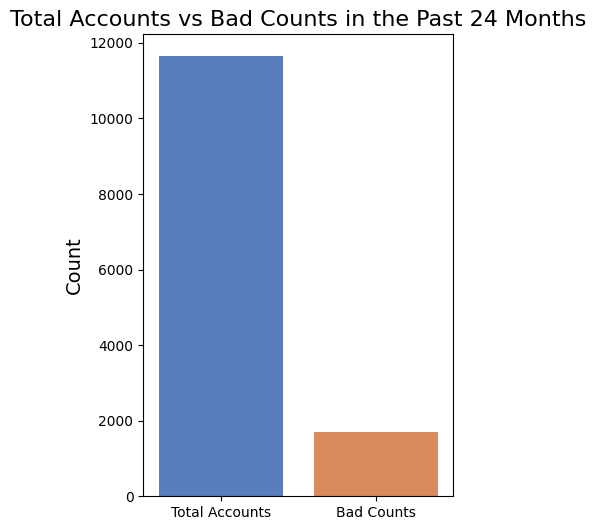

In [69]:
total_accounts = 0
total_bad_counts = 0

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
    total_accounts += row['TLCnt24']
    total_bad_counts += row['TLBadCnt24']

# Create a bar plot
plt.figure(figsize=(4, 6))
sns.barplot(x=['Total Accounts', 'Bad Counts'], y=[total_accounts, total_bad_counts], palette='muted')

# Add labels and title
plt.title('Total Accounts vs Bad Counts in the Past 24 Months', fontsize=16)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

In [70]:
print('the total number of credit accounts opened in the last 24 months:', total_accounts,'\nThe Bad count:', total_bad_counts)
print((total_bad_counts/total_accounts)*100)

the total number of credit accounts opened in the last 24 months: 11647.0 
The Bad count: 1701.0
14.604619215248563


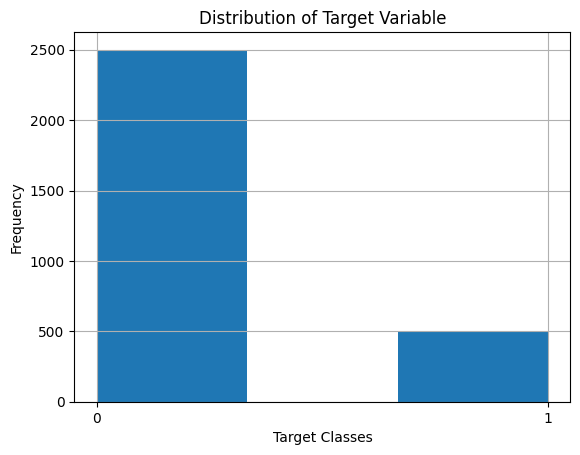

In [71]:
df['TARGET'].hist(bins=3)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Classes')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.show()


Visualizing the TARGET variable with a histogram is a critical step in understanding the distribution of our target classes. It helps in identifying class imbalances, which can significantly impact model performance and guide the choice of modeling strategies and evaluation metrics.


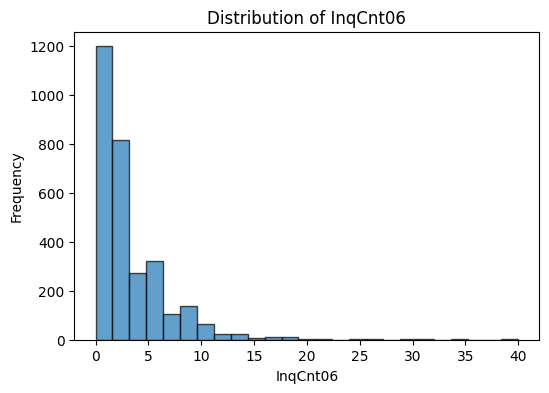

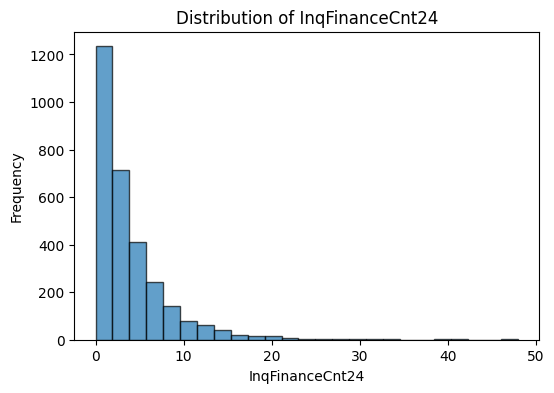

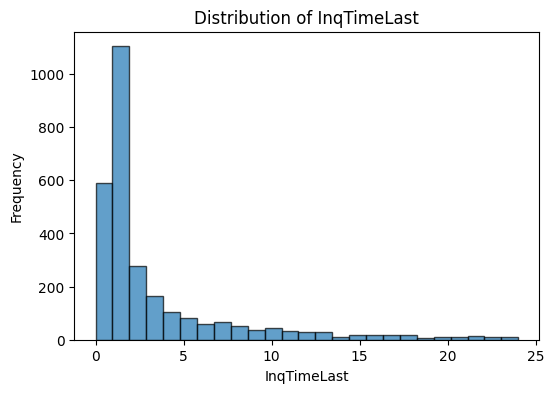

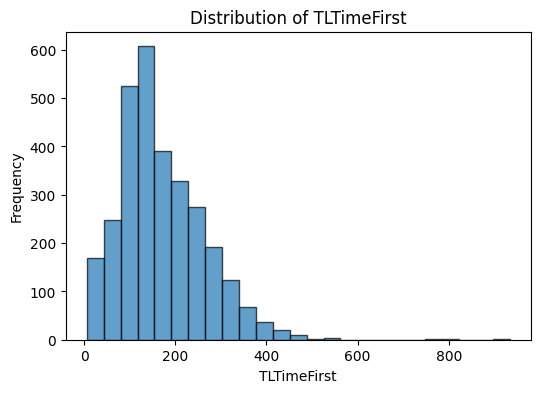

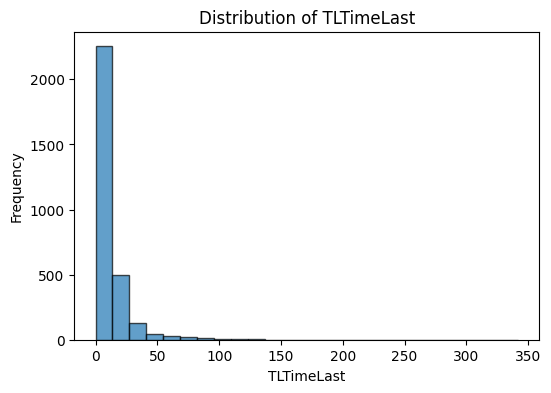

In [72]:
age_related_attributes = ['InqCnt06', 'InqFinanceCnt24', 'InqTimeLast', 'TLTimeFirst', 'TLTimeLast']

for attribute in age_related_attributes:
    plt.figure(figsize=(6, 4))
    df[attribute].hist(bins=25, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

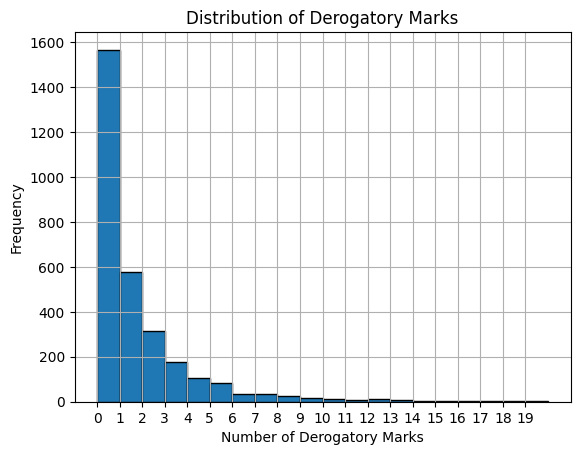

In [73]:
df['DerogCnt'].hist(bins=range(0,21), edgecolor='k')
plt.title('Distribution of Derogatory Marks')
plt.xlabel('Number of Derogatory Marks')
plt.ylabel('Frequency')
plt.xticks(range(0,20))
plt.show()


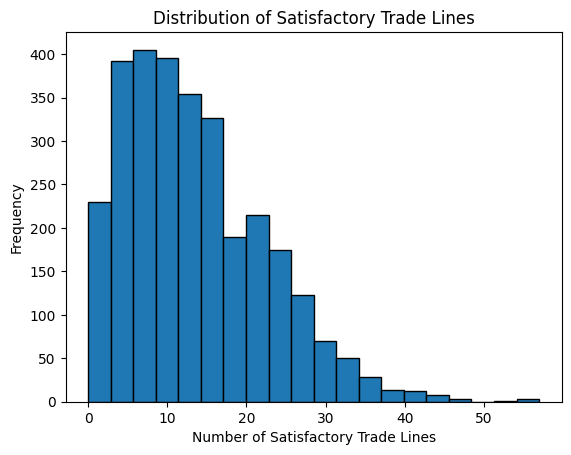

In [74]:
df['TLSatCnt'].hist(bins=20, edgecolor='k')
plt.title('Distribution of Satisfactory Trade Lines')
plt.xlabel('Number of Satisfactory Trade Lines')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


In [75]:
selected_columns = []

# Iterate through columns and check standard deviation
for column in df.columns:
    std_dev = df[column].std()
    if std_dev > 4:
        selected_columns.append(column)

# Create a new DataFrame with selected columns
new_df = df[selected_columns]

# Optional: Print selected columns
print("Selected columns with std deviation > 4:")
print(selected_columns)



Selected columns with std deviation > 4:
['ID', 'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt']


In [76]:
columns_to_remove = ['ID', 'InqTimeLast', 'TLTimeLast']

# Permanently remove columns
new_df.drop(columns=columns_to_remove, inplace=True)

# Optionally, you can print the modified DataFrame
print(new_df.head())

   InqFinanceCnt24  TLTimeFirst  TLCnt    TLSum  TLMaxSum  TLSatCnt
0                5          117    5.0  19410.0   21147.0      16.0
1                3           14    1.0  16776.0   20971.0       1.0
2                1          354   19.0  16903.0   47593.0      21.0
3               10           16    3.0  18339.0   20093.0       1.0
4                8          130    1.0   2327.0    1860.0       3.0


C:\Users\itsra\AppData\Local\Temp\ipykernel_6140\1834348481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=columns_to_remove, inplace=True)


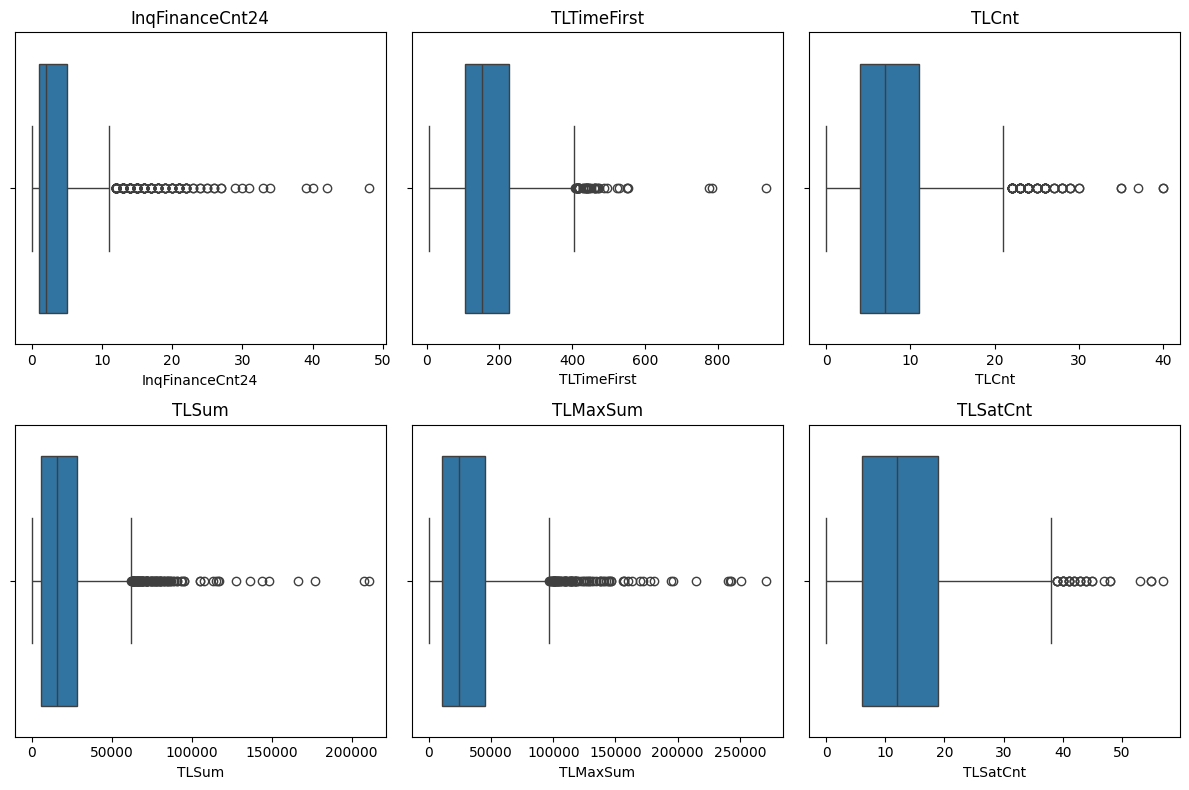

In [77]:
columns_of_interest = ['InqFinanceCnt24', 'TLTimeFirst', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt']

# Creating box plots for each column
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_of_interest, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

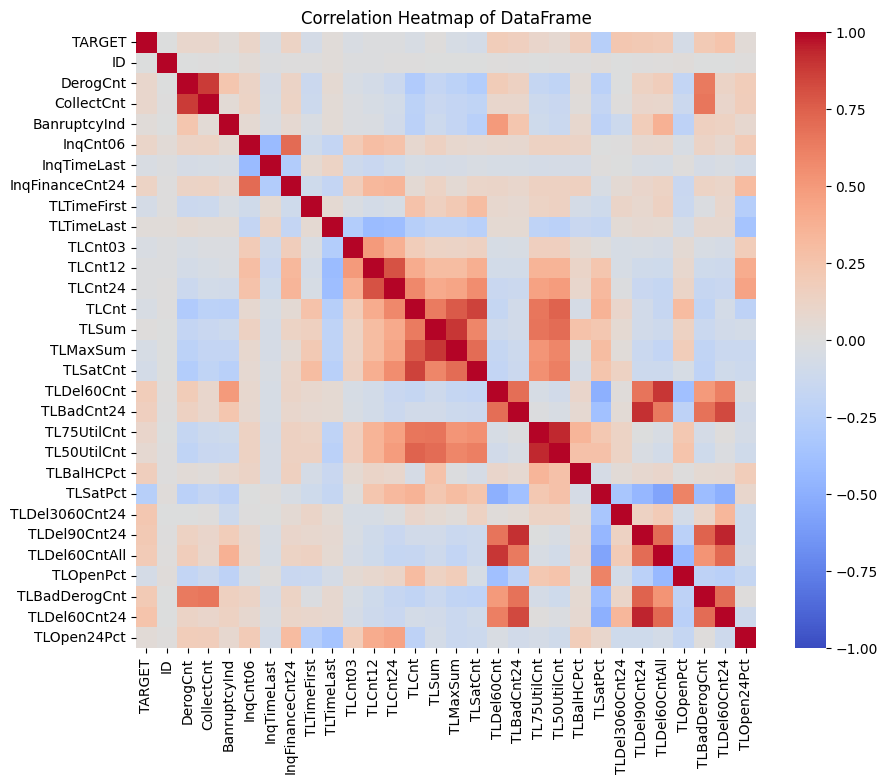

In [78]:
corr_matrix = df.corr()

# Plot heatmap without annotation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of DataFrame')
plt.show()

In [79]:
print(df.corr())

                   TARGET        ID  DerogCnt  CollectCnt  BanruptcyInd  \
TARGET           1.000000 -0.003318  0.088100    0.093748      0.025651   
ID              -0.003318  1.000000 -0.000265    0.005866     -0.003411   
DerogCnt         0.088100 -0.000265  1.000000    0.880225      0.234483   
CollectCnt       0.093748  0.005866  0.880225    1.000000      0.046569   
BanruptcyInd     0.025651 -0.003411  0.234483    0.046569      1.000000   
InqCnt06         0.106663  0.031619  0.121201    0.129457      0.056958   
InqTimeLast     -0.033791 -0.009897 -0.056291   -0.051427     -0.036385   
InqFinanceCnt24  0.132562  0.002469  0.121380    0.125594      0.066893   
TLTimeFirst     -0.069597  0.003226 -0.128078   -0.120547     -0.033829   
TLTimeLast       0.030648  0.026395  0.061630    0.042997      0.043319   
TLCnt03         -0.036116 -0.009378 -0.040843   -0.022005     -0.019870   
TLCnt12         -0.012391 -0.009938 -0.072697   -0.052378     -0.030188   
TLCnt24         -0.009525

In [80]:
columns_to_impute = [col for col in df.columns if df[col].isnull().sum() < 5]

# Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)

# Only apply KNN imputer to the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify the imputation
print(df.isnull().sum())

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                0
TLSum               40
TLMaxSum            40
TLSatCnt             0
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             0
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            0
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          0
dtype: int64


In [81]:


# Assuming df is your DataFrame
# Define the feature categories for Min-Max Scaling and Standardization
min_max_features_counts = [
    'DerogCnt', 'CollectCnt', 'InqCnt06', 'InqFinanceCnt24', 'TLCnt03', 'TLCnt12',
    'TLCnt24', 'TLCnt', 'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 
    'TL50UtilCnt', 'TLDel3060Cnt24', 'TLDel90Cnt24', 'TLDel60CntAll', 'TLBadDerogCnt', 'TLDel60Cnt24'
]

min_max_features_percentages = [
    'TLBalHCPct', 'TLSatPct', 'TLOpenPct', 'TLOpen24Pct'
]

min_max_features_binary = ['BanruptcyInd']

standard_features_time = ['InqTimeLast', 'TLTimeFirst', 'TLTimeLast']
standard_features_sum = ['TLSum', 'TLMaxSum']

# Combine all features for Min-Max Scaling
min_max_features = min_max_features_counts + min_max_features_percentages + min_max_features_binary

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Scaling
df[min_max_features] = min_max_scaler.fit_transform(df[min_max_features])

# Apply Standardization
df[standard_features_time] = standard_scaler.fit_transform(df[standard_features_time])
df[standard_features_sum] = standard_scaler.fit_transform(df[standard_features_sum])

# Verify the transformations
print(df.head())


   TARGET      ID  DerogCnt  CollectCnt  BanruptcyInd  InqCnt06  InqTimeLast  \
0     1.0   582.0  0.058824        0.06           0.0     0.100    -0.670283   
1     1.0   662.0  0.294118        0.18           0.0     0.075    -0.454627   
2     1.0   805.0  0.000000        0.00           0.0     0.025     0.407999   
3     1.0  1175.0  0.156863        0.10           0.0     0.150    -0.454627   
4     1.0  1373.0  0.058824        0.02           0.0     0.225    -0.670283   

   InqFinanceCnt24  TLTimeFirst  TLTimeLast  TLCnt03   TLCnt12   TLCnt24  \
0         0.104167    -0.572356    0.926933      0.0  0.000000  0.000000   
1         0.062500    -1.682291    0.130300      0.0  0.000000  0.035714   
2         0.020833     1.981572   -0.298655      0.0  0.133333  0.357143   
3         0.208333    -1.660739   -0.482494      0.0  0.133333  0.142857   
4         0.166667    -0.432268    2.458918      0.0  0.000000  0.000000   

   TLCnt     TLSum  TLMaxSum  TLSatCnt  TLDel60Cnt  TLBadCnt24

In [82]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Sample DataFrame based on your provided data with an added datetime column
# data = {
#     'TARGET': [1, 1, 1],
#     'ID': [582, 662, 805],
#     'DerogCnt': [3, 15, 0],
#     'CollectCnt': [3, 9, 0],
#     'BanruptcyInd': [0, 0, 0],
#     'InqCnt06': [4, 3, 1],
#     'InqTimeLast': [0.0, 1.0, 5.0],
#     'InqFinanceCnt24': [5, 3, 1],
#     'TLTimeFirst': [117, 14, 354],
#     'TLTimeLast': [27, 14, 7],
#     'TLCnt03': [0, 0, 0],
#     'TLCnt12': [0, 0, 2],
#     'TLCnt24': [0, 0, 10],
#     'TLCnt': [5, 1, 19],
#     'TLSum': [19410.0, 16776.0, 16903.0],
#     'TLMaxSum': [21147.0, 20971.0, 47593.0],
#     'TLSatCnt': [16.0, 1.0, 21.0],
#     'TLDel60Cnt': [2, 0, 1],
#     'TLBadCnt24': [1, 0, 1],
#     'TL75UtilCnt': [3.0, 1.0, 4.0],
#     'TL50UtilCnt': [3.0, 1.0, 5.0],
#     'TLBalHCPct': [0.9179, 0.8000, 0.3552],
#     'TLSatPct': [0.2083, 0.0000, 0.6538],
#     'TLDel3060Cnt24': [2, 0, 0],
#     'TLDel90Cnt24': [3, 0, 1],
#     'TLDel60CntAll': [7, 0, 1],
#     'TLOpenPct': [0.2083, 1.0000, 0.7308],
#     'TLBadDerogCnt': [4, 12, 1],
#     'TLDel60Cnt24': [4, 0, 1],
#     'TLOpen24Pct': [0.0000, 1.0000, 0.5263],
#     'datetime_col': pd.date_range(start='2023-01-01', periods=3, freq='H')
# }

# df = pd.DataFrame(data)

# # Extracting datetime features
# df['year'] = df['datetime_col'].dt.year
# df['month'] = df['datetime_col'].dt.month
# df['day'] = df['datetime_col'].dt.day
# df['hour'] = df['datetime_col'].dt.hour
# df['minute'] = df['datetime_col'].dt.minute
# df['second'] = df['datetime_col'].dt.second
# df['weekday'] = df['datetime_col'].dt.weekday  # Monday=0, Sunday=6
# df['weekofyear'] = df['datetime_col'].dt.isocalendar().week

# # Encoding cyclic features
# df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
# df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
# df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

# # Verify the DataFrame with extracted and cyclic features
# print(df[['datetime_col', 'year', 'month', 'day', 'hour', 'minute', 'second', 'weekday', 'weekofyear', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos']])


In [83]:

# Columns to impute
columns_to_impute = ['InqTimeLast', 'TLMaxSum', 'TL75UtilCnt', 'TL50UtilCnt', 'TLBalHCPct']

# Initialize IterativeImputer with RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0, max_iter=10, n_nearest_features=None)

# Fit and transform the specified columns to impute missing values
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Display the imputed DataFrame
print(df.head())




   TARGET      ID  DerogCnt  CollectCnt  BanruptcyInd  InqCnt06  InqTimeLast  \
0     1.0   582.0  0.058824        0.06           0.0     0.100    -0.670283   
1     1.0   662.0  0.294118        0.18           0.0     0.075    -0.454627   
2     1.0   805.0  0.000000        0.00           0.0     0.025     0.407999   
3     1.0  1175.0  0.156863        0.10           0.0     0.150    -0.454627   
4     1.0  1373.0  0.058824        0.02           0.0     0.225    -0.670283   

   InqFinanceCnt24  TLTimeFirst  TLTimeLast  TLCnt03   TLCnt12   TLCnt24  \
0         0.104167    -0.572356    0.926933      0.0  0.000000  0.000000   
1         0.062500    -1.682291    0.130300      0.0  0.000000  0.035714   
2         0.020833     1.981572   -0.298655      0.0  0.133333  0.357143   
3         0.208333    -1.660739   -0.482494      0.0  0.133333  0.142857   
4         0.166667    -0.432268    2.458918      0.0  0.000000  0.000000   

   TLCnt     TLSum  TLMaxSum  TLSatCnt  TLDel60Cnt  TLBadCnt24

c:\Users\itsra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [84]:
print(df.isnull().sum())

TARGET              0
ID                  0
DerogCnt            0
CollectCnt          0
BanruptcyInd        0
InqCnt06            0
InqTimeLast         0
InqFinanceCnt24     0
TLTimeFirst         0
TLTimeLast          0
TLCnt03             0
TLCnt12             0
TLCnt24             0
TLCnt               0
TLSum              40
TLMaxSum            0
TLSatCnt            0
TLDel60Cnt          0
TLBadCnt24          0
TL75UtilCnt         0
TL50UtilCnt         0
TLBalHCPct          0
TLSatPct            0
TLDel3060Cnt24      0
TLDel90Cnt24        0
TLDel60CntAll       0
TLOpenPct           0
TLBadDerogCnt       0
TLDel60Cnt24        0
TLOpen24Pct         0
dtype: int64


In [85]:
import pandas as pd
import numpy as np

def handle_outliers(df, columns):
    """
    Handle outliers in specified columns using the IQR method:
    Capping values beyond the lower and upper bounds to the respective bounds.

    Parameters:
    - df: DataFrame containing the data.
    - columns: List of column names to process for outlier handling.

    Returns:
    - DataFrame with outlier-handled values.
    """
    df_processed = df.copy()

    for col in columns:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
        df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

    return df_processed

# Example usage:
# Assuming df is your DataFrame with numerical columns
# df = pd.read_csv('your_dataset.csv')

# Specify columns to handle outliers
columns_to_handle = ['InqFinanceCnt24', 'TLTimeFirst', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt']

# Handle outliers using the function
df_processed = handle_outliers(df, columns_to_handle)
df=df_processed.copy()

# Print the processed DataFrame
print(df_processed.head())


   TARGET      ID  DerogCnt  CollectCnt  BanruptcyInd  InqCnt06  InqTimeLast  \
0     1.0   582.0  0.058824        0.06           0.0     0.100    -0.670283   
1     1.0   662.0  0.294118        0.18           0.0     0.075    -0.454627   
2     1.0   805.0  0.000000        0.00           0.0     0.025     0.407999   
3     1.0  1175.0  0.156863        0.10           0.0     0.150    -0.454627   
4     1.0  1373.0  0.058824        0.02           0.0     0.225    -0.670283   

   InqFinanceCnt24  TLTimeFirst  TLTimeLast  TLCnt03   TLCnt12   TLCnt24  \
0         0.104167    -0.572356    0.926933      0.0  0.000000  0.000000   
1         0.062500    -1.682291    0.130300      0.0  0.000000  0.035714   
2         0.020833     1.981572   -0.298655      0.0  0.133333  0.357143   
3         0.208333    -1.660739   -0.482494      0.0  0.133333  0.142857   
4         0.166667    -0.432268    2.458918      0.0  0.000000  0.000000   

   TLCnt     TLSum  TLMaxSum  TLSatCnt  TLDel60Cnt  TLBadCnt24

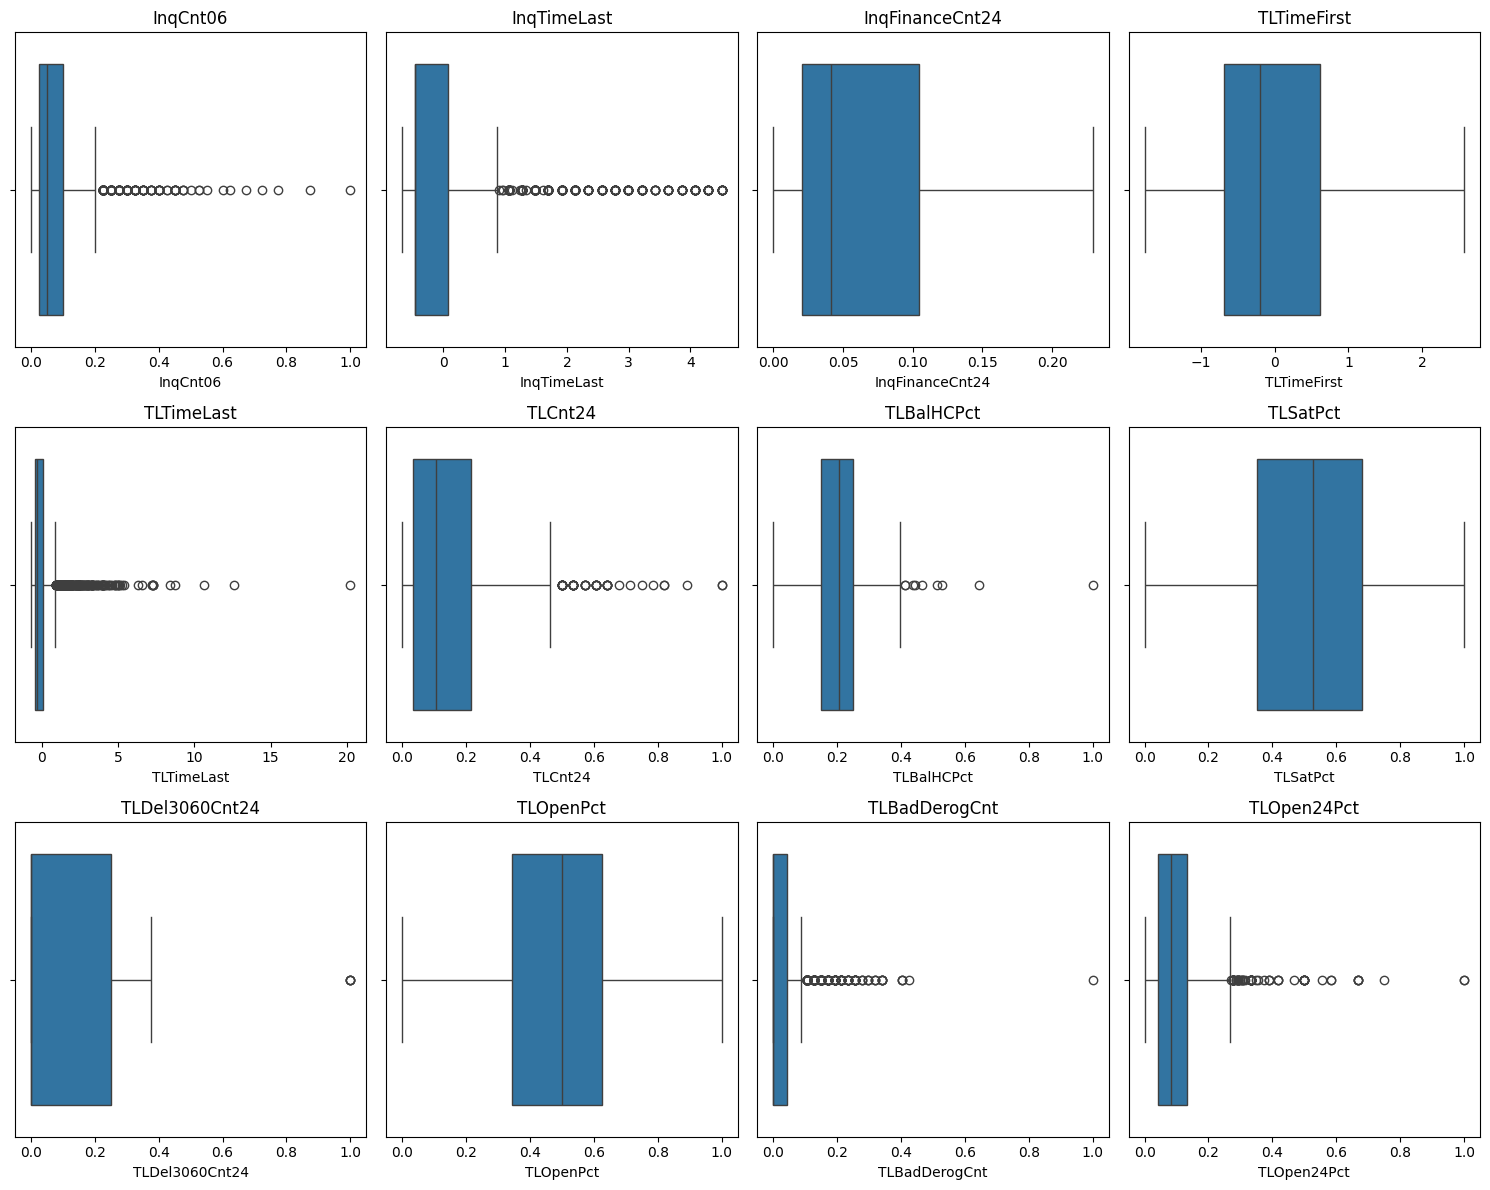

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to create box plots for
columns_of_interest = ['InqCnt06', 'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst',
                       'TLTimeLast', 'TLCnt24', 'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24',
                       'TLOpenPct', 'TLBadDerogCnt', 'TLOpen24Pct']

# Create a figure with a specified size
plt.figure(figsize=(15, 12))  # Adjusted the figure size to better accommodate the grid

# Loop through each column to create a box plot
for i, col in enumerate(columns_of_interest, start=1):
    plt.subplot(3, 4, i)  # Arrange plots in a 3x4 grid (3 rows, 4 columns)
    sns.boxplot(x=df[col])  # Create a boxplot for the column
    plt.title(col)  # Set the title to the column name

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# Show the plots
plt.show()


In [87]:
import pandas as pd
import numpy as np

def handle_outliers(df, columns):
    """
    Handle outliers in specified columns using the IQR method:
    Capping values beyond the lower and upper bounds to the respective bounds.

    Parameters:
    - df: DataFrame containing the data.
    - columns: List of column names to process for outlier handling.

    Returns:
    - DataFrame with outlier-handled values.
    """
    df_processed = df.copy()

    for col in columns:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
        df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

    return df_processed

# Example usage:
# Assuming df is your DataFrame with numerical columns
# df = pd.read_csv('your_dataset.csv')

# Specify columns to handle outliers
columns_to_handle = ['InqCnt06', 'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst',
                       'TLTimeLast', 'TLCnt24', 'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24',
                       'TLOpenPct', 'TLBadDerogCnt', 'TLOpen24Pct']

# Handle outliers using the function
df_processed = handle_outliers(df, columns_to_handle)
df=df_processed.copy()

# Print the processed DataFrame
print(df_processed.head())


   TARGET      ID  DerogCnt  CollectCnt  BanruptcyInd  InqCnt06  InqTimeLast  \
0     1.0   582.0  0.058824        0.06           0.0    0.1000    -0.670283   
1     1.0   662.0  0.294118        0.18           0.0    0.0750    -0.454627   
2     1.0   805.0  0.000000        0.00           0.0    0.0250     0.407999   
3     1.0  1175.0  0.156863        0.10           0.0    0.1500    -0.454627   
4     1.0  1373.0  0.058824        0.02           0.0    0.2125    -0.670283   

   InqFinanceCnt24  TLTimeFirst  TLTimeLast  TLCnt03   TLCnt12   TLCnt24  \
0         0.104167    -0.572356    0.896293      0.0  0.000000  0.000000   
1         0.062500    -1.682291    0.130300      0.0  0.000000  0.035714   
2         0.020833     1.981572   -0.298655      0.0  0.133333  0.357143   
3         0.208333    -1.660739   -0.482494      0.0  0.133333  0.142857   
4         0.166667    -0.432268    0.896293      0.0  0.000000  0.000000   

   TLCnt     TLSum  TLMaxSum  TLSatCnt  TLDel60Cnt  TLBadCnt24

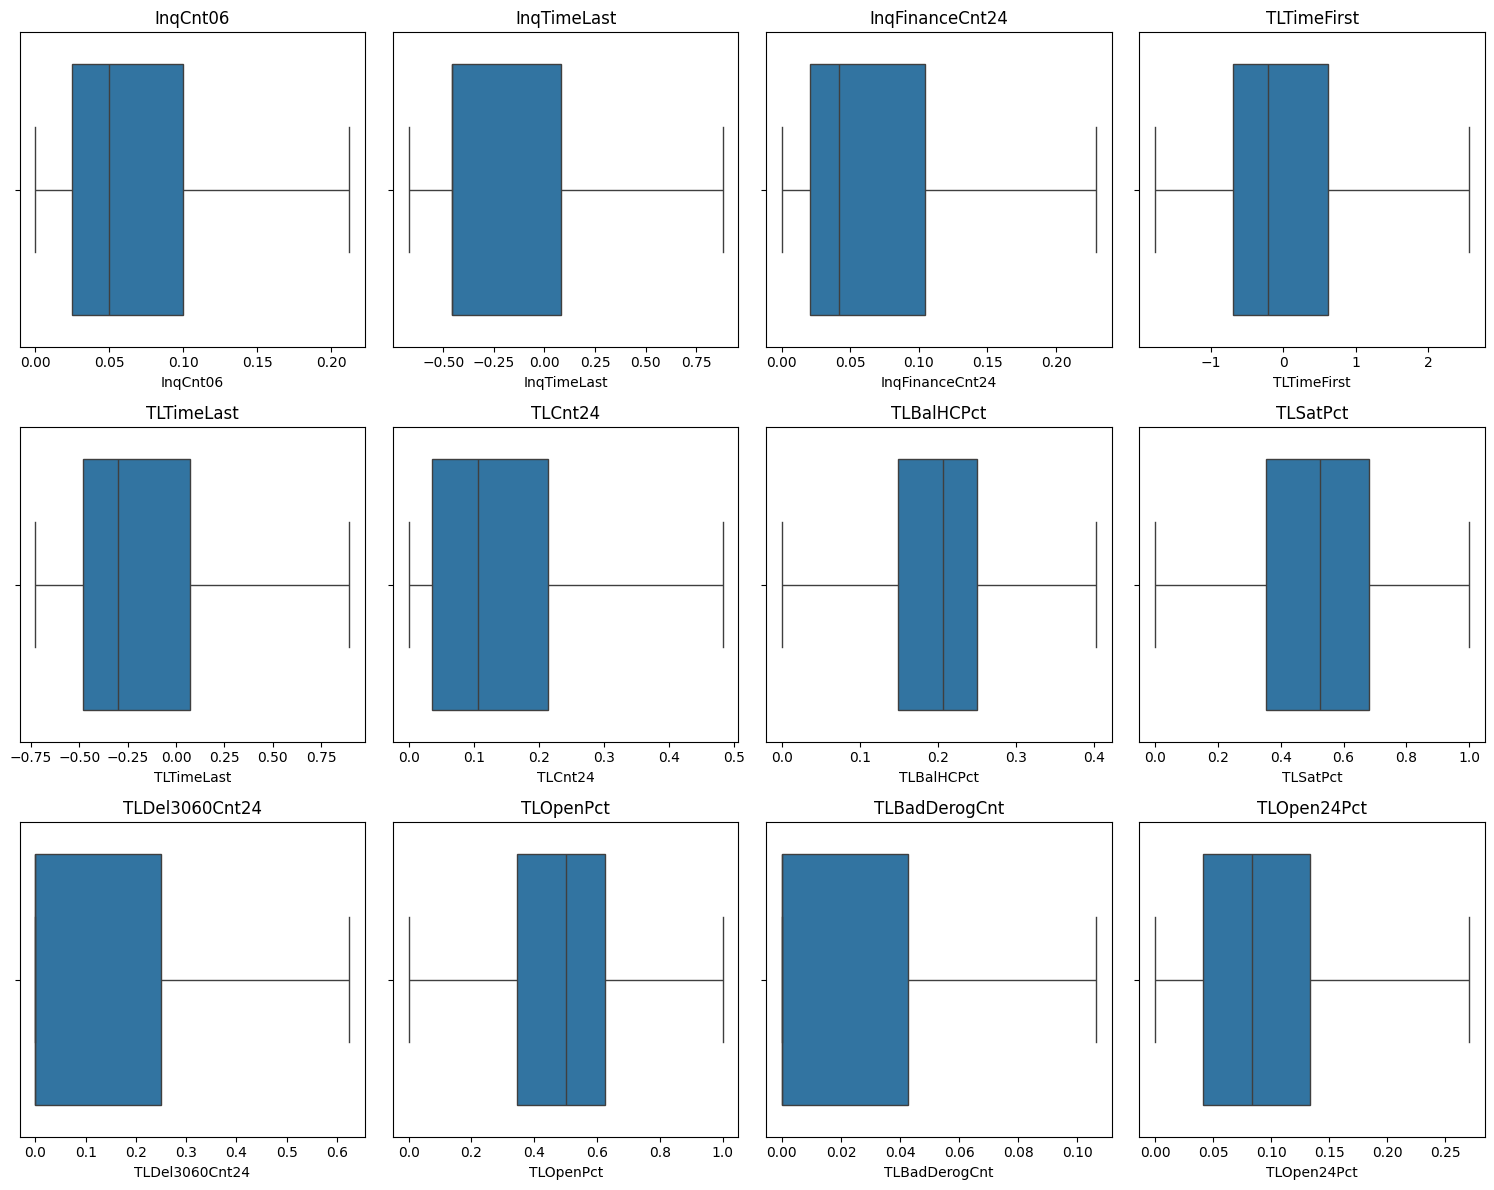

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to create box plots for
columns_of_interest = ['InqCnt06', 'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst',
                       'TLTimeLast', 'TLCnt24', 'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24',
                       'TLOpenPct', 'TLBadDerogCnt', 'TLOpen24Pct']

# Create a figure with a specified size
plt.figure(figsize=(15, 12))  # Adjusted the figure size to better accommodate the grid

# Loop through each column to create a box plot
for i, col in enumerate(columns_of_interest, start=1):
    plt.subplot(3, 4, i)  # Arrange plots in a 3x4 grid (3 rows, 4 columns)
    sns.boxplot(x=df[col])  # Create a boxplot for the column
    plt.title(col)  # Set the title to the column name

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# Show the plots
plt.show()


In [89]:
df.dtypes

TARGET             float64
ID                 float64
DerogCnt           float64
CollectCnt         float64
BanruptcyInd       float64
InqCnt06           float64
InqTimeLast        float64
InqFinanceCnt24    float64
TLTimeFirst        float64
TLTimeLast         float64
TLCnt03            float64
TLCnt12            float64
TLCnt24            float64
TLCnt              float64
TLSum              float64
TLMaxSum           float64
TLSatCnt           float64
TLDel60Cnt         float64
TLBadCnt24         float64
TL75UtilCnt        float64
TL50UtilCnt        float64
TLBalHCPct         float64
TLSatPct           float64
TLDel3060Cnt24     float64
TLDel90Cnt24       float64
TLDel60CntAll      float64
TLOpenPct          float64
TLBadDerogCnt      float64
TLDel60Cnt24       float64
TLOpen24Pct        float64
dtype: object

In [90]:
#df.drop(columns=['datetime_col', 'weekofyear'], inplace=True)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Assuming X and y are already defined and preprocessed
target_col = 'TARGET'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.4f}')


ROC-AUC Score: 0.5500


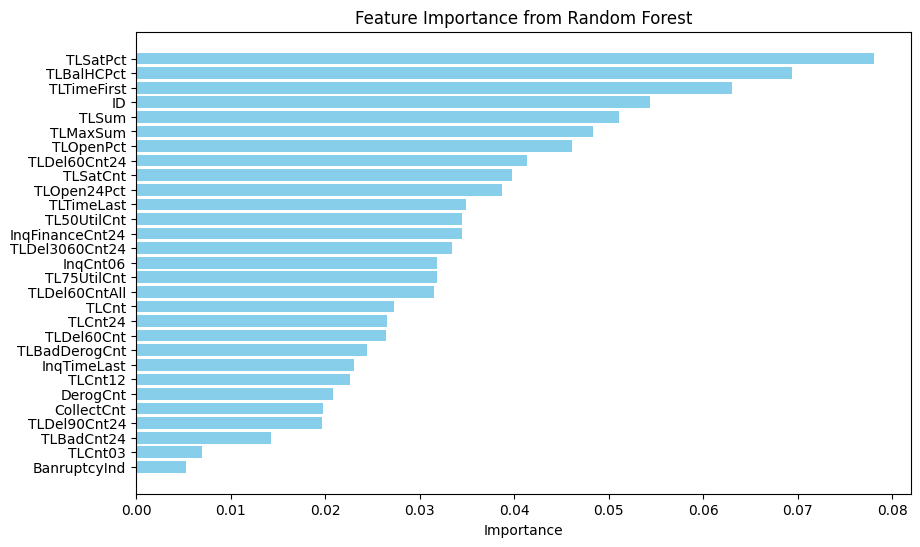

            Feature  Importance
21         TLSatPct    0.078067
20       TLBalHCPct    0.069345
7       TLTimeFirst    0.062988
0                ID    0.054402
13            TLSum    0.051108
14         TLMaxSum    0.048287
25        TLOpenPct    0.046161
27     TLDel60Cnt24    0.041384
15         TLSatCnt    0.039735
28      TLOpen24Pct    0.038758
8        TLTimeLast    0.034947
19      TL50UtilCnt    0.034471
6   InqFinanceCnt24    0.034463
22   TLDel3060Cnt24    0.033463
4          InqCnt06    0.031869
18      TL75UtilCnt    0.031803
24    TLDel60CntAll    0.031549
12            TLCnt    0.027313
11          TLCnt24    0.026594
16       TLDel60Cnt    0.026408
26    TLBadDerogCnt    0.024419
5       InqTimeLast    0.023025
10          TLCnt12    0.022596
1          DerogCnt    0.020789
2        CollectCnt    0.019782
23     TLDel90Cnt24    0.019670
17       TLBadCnt24    0.014316
9           TLCnt03    0.007014
3      BanruptcyInd    0.005275


In [92]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and target_col is your target variable column
# df = pd.read_csv('your_dataset.csv')
target_col = 'TARGET'

# Separate features (X) and target variable (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature on top
plt.show()

# Optionally, print the feature importance values
print(feature_importance_df)


In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and target_col is your target variable column
# df = pd.read_csv('your_dataset.csv')
# target_col = 'target_variable'

# Separate features (X) and target variable (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.02

# Filter columns with importance below the threshold
columns_to_drop = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature'].tolist()

# Drop columns from the original DataFrame
df = df.drop(columns_to_drop, axis=1)

# Display the resulting DataFrame with filtered columns
print(df.head())


   TARGET      ID  DerogCnt  InqCnt06  InqTimeLast  InqFinanceCnt24  \
0     1.0   582.0  0.058824    0.1000    -0.670283         0.104167   
1     1.0   662.0  0.294118    0.0750    -0.454627         0.062500   
2     1.0   805.0  0.000000    0.0250     0.407999         0.020833   
3     1.0  1175.0  0.156863    0.1500    -0.454627         0.208333   
4     1.0  1373.0  0.058824    0.2125    -0.670283         0.166667   

   TLTimeFirst  TLTimeLast   TLCnt12   TLCnt24  TLCnt     TLSum  TLMaxSum  \
0    -0.572356    0.896293  0.000000  0.000000  0.125 -0.037660 -0.345809   
1    -1.682291    0.130300  0.000000  0.035714  0.025 -0.171510 -0.351860   
2     1.981572   -0.298655  0.133333  0.357143  0.475 -0.165056  0.563363   
3    -1.660739   -0.482494  0.133333  0.142857  0.075 -0.092084 -0.382044   
4    -0.432268    0.896293  0.000000  0.000000  0.025 -0.905753 -1.008866   

   TLSatCnt  TLDel60Cnt  TL75UtilCnt  TL50UtilCnt  TLBalHCPct  TLSatPct  \
0  0.280702    0.052632         0.1

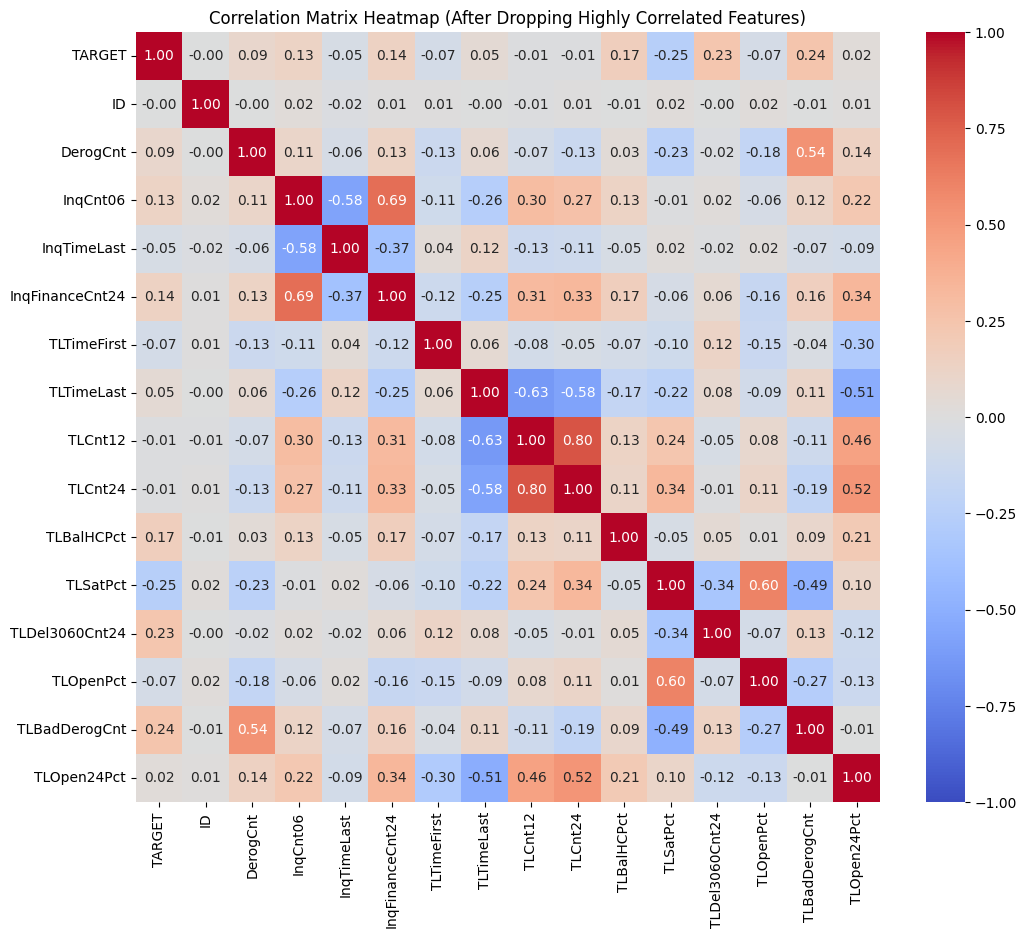

Dropped columns: {'TLMaxSum', 'TL50UtilCnt', 'TLDel60CntAll', 'TLDel60Cnt24', 'TLSum', 'TL75UtilCnt', 'TLDel90Cnt24', 'TLSatCnt', 'TLCnt', 'TLDel60Cnt'}


In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Create a mask to identify features with correlations above 0.8
high_corr_mask = corr_matrix > 0.8

# Exclude diagonal elements and lower triangle of correlation matrix
high_corr_mask = high_corr_mask & ~np.eye(len(corr_matrix), dtype=bool)

# Find pairs of highly correlated features
high_corr_pairs = np.where(high_corr_mask)

# Set to store columns to drop
cols_to_drop = set()

# Iterate through correlated pairs and drop one of each pair
for i, j in zip(*high_corr_pairs):
    if j not in cols_to_drop:  # Ensure we only drop one column from each pair
        cols_to_drop.add(df.columns[j])

# Drop the identified columns from the DataFrame
df_filtered = df.drop(columns=cols_to_drop)

# Optional: Visualize the correlation matrix after dropping
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap (After Dropping Highly Correlated Features)')
plt.show()

df = df_filtered.copy()
# Print the columns dropped
print("Dropped columns:", cols_to_drop)


In [95]:
df.shape

(3000, 16)

In [96]:
df=df.drop('ID', axis=1)

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are already defined and preprocessed
# X = your feature matrix, y = your target variable

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')



Random Forest Accuracy: 0.8322
ROC-AUC Score: 0.5340
Mean Squared Error (MSE): 0.1678
R^2 Score: -0.2080


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming df is your DataFrame with features and target
# Separate features (X) and target variable (y)
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (NaNs) using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose strategy like 'mean', 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Gradient Boosting Classifier
gbm = GradientBoostingClassifier()
gbm.fit(X_train_imputed, y_train)

# Predict probabilities for the test set
y_prob_gbm = gbm.predict_proba(X_test_imputed)[:, 1]

# Calculate ROC AUC score
roc_auc_gbm = roc_auc_score(y_test, y_prob_gbm)
print(f'Gradient Boosting Machine ROC-AUC Score: {roc_auc_gbm:.4f}')

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_prob_gbm)
r2 = r2_score(y_test, y_prob_gbm)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')



Gradient Boosting Machine ROC-AUC Score: 0.7857
Mean Squared Error (MSE): 0.1381
R^2 Score: 0.1256


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame with features and target
# Separate features (X) and target variable (y)
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')



Logistic Regression Accuracy: 0.8289
Mean Squared Error (MSE): 0.1711
R^2 Score: -0.1593


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame with features and target
# Separate features (X) and target variable (y)
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')


Mean Squared Error (MSE): 0.1301
R^2 Score: 0.1762


In regression, there's no "accuracy" metric like in classification.
Instead, focus on metrics like MSE, R², or Mean Absolute Error (MAE).